In [1]:
import pandas as pd
df = pd.read_csv('loan_approval_dataset.csv')
df.shape

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


(4269, 13)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
for x in df.columns:
    print(df[x].value_counts())
    print("*"*30)

loan_id
1       1
2852    1
2838    1
2839    1
2840    1
       ..
1430    1
1431    1
1432    1
1433    1
4269    1
Name: count, Length: 4269, dtype: int64
******************************
no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64
******************************
education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64
******************************
self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64
******************************
income_annum
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64
******************************
loan_amount
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name: count, Length: 378, dtype: int64
***********************

In [7]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [8]:
df['education'] = lab.fit_transform(df['education'])

In [9]:
df['loan_status'] = df['loan_status'].str.strip()

In [10]:
df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1, 0])


In [11]:
df['self_employed'] = lab.fit_transform(df['self_employed'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int32
 3   self_employed             4269 non-null   int32
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int32(2), int64(11)
memory usage: 400.3 KB


In [13]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [14]:
df['assest'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value']+df['bank_asset_value']


In [15]:
df = df.drop(columns=['loan_id','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'])

In [16]:
x = df.drop(columns=['loan_status'])

In [17]:
y = df['loan_status']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [19]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

In [20]:
scl_x_train = scl.fit_transform(x_train)
scl_x_test = scl.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [22]:
log.fit(scl_x_train,y_train)

LogisticRegression()

In [23]:
 y_pred = log.predict(scl_x_test)


In [24]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_pred,y_test)

In [25]:
log.score(scl_x_test,y_test)

0.914519906323185

In [26]:
df.sample()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assest
4066,4,0,0,3700000,12300000,6,364,0,28200000


In [27]:
pred_data = pd.DataFrame([['3','0','1','3800000','10400000','14','410','28300000']],columns=['no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term','cibil_score','assest'])

In [28]:
pred_data = scl.transform(pred_data)

In [29]:
log.predict(pred_data)

array([0], dtype=int64)

In [30]:
import pickle as pk

In [31]:
pk.dump(log,open('log.pkl','wb'))

In [32]:
pk.dump(scl,open('scl.pkl','wb'))

In [33]:
import pickle 

 When we use matplotlib.pyplot, especially with functions like plt.plot() or plt.scatter(), it is often better to pass NumPy arrays to avoid compatibility issues.

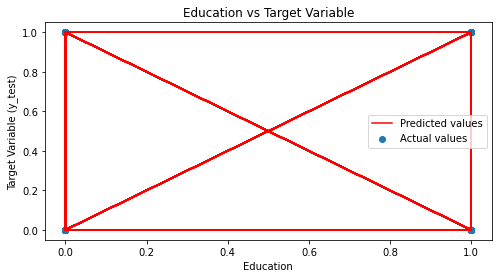

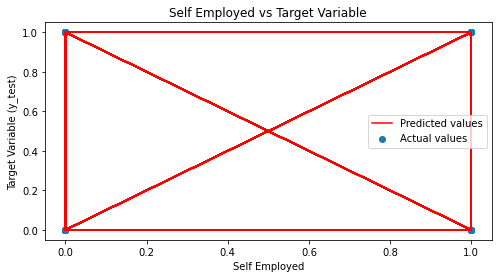

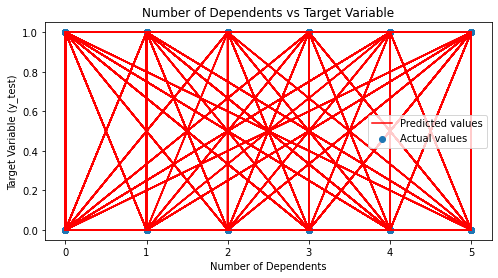

In [36]:
import matplotlib.pyplot as plt
import numpy as np

education = x_test['education'].to_numpy()  
self_employed = x_test['self_employed'].to_numpy() 
no_of_dependents = x_test['no_of_dependents'].to_numpy()  
# Plot 1: education vs y_test
plt.figure(figsize=(8, 4))
plt.scatter(education, y_test, label='Actual values') 
plt.plot(education, y_pred, 'r', label='Predicted values')  
plt.xlabel('Education')
plt.ylabel('Target Variable (y_test)')
plt.title('Education vs Target Variable')
plt.legend()
plt.show()

# Plot 2: self_employed vs y_test
plt.figure(figsize=(8, 4))
plt.scatter(self_employed, y_test, label='Actual values')  
plt.plot(self_employed, y_pred, 'r', label='Predicted values')  
plt.xlabel('Self Employed')
plt.ylabel('Target Variable (y_test)')
plt.title('Self Employed vs Target Variable')
plt.legend()
plt.show()

# Plot 3: no_of_dependents vs y_test
plt.figure(figsize=(8, 4))
plt.scatter(no_of_dependents, y_test, label='Actual values') 
plt.plot(no_of_dependents, y_pred, 'r', label='Predicted values')  
plt.xlabel('Number of Dependents')
plt.ylabel('Target Variable (y_test)')
plt.title('Number of Dependents vs Target Variable')
plt.legend()
plt.show()
